In [18]:
# conda install scikit-learn

In [19]:
import sklearn
sklearn.__version__

'1.0.2'

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Reading the Data

In [22]:
input_data = pd.read_excel("market.xlsx")

In [23]:
# Independent Variable
indep = input_data["Marketing Spend"]
indep

0     14885
1     22769
2     27442
3     27781
4     34231
5     38802
6     44773
7     48507
8     51504
9     53693
10    61519
11    62676
12    72730
13    72899
14    75894
15    76598
16    78396
17    80605
18    84421
19    91915
20    27750
21    34200
22    78000
23    80600
24    84400
Name: Marketing Spend, dtype: int64

In [29]:
indep.shape # 1-D
indep = indep.reshape(-1,1)# Making it 2-D
indep.shape

(25, 1)

In [55]:
indep

array([[14885],
       [22769],
       [27442],
       [27781],
       [34231],
       [38802],
       [44773],
       [48507],
       [51504],
       [53693],
       [61519],
       [62676],
       [72730],
       [72899],
       [75894],
       [76598],
       [78396],
       [80605],
       [84421],
       [91915],
       [27750],
       [34200],
       [78000],
       [80600],
       [84400]], dtype=int64)

In [30]:
# Dependent Variable
dep = input_data["Revenue"]
dep

0     412288
1     464161
2     487871
3     529504
4     557891
5     598954
6     625772
7     679932
8     694673
9     702248
10    705885
11    703096
12    708950
13    703269
14    712512
15    728969
16    730411
17    731940
18    739228
19    743833
20    529450
21    557700
22    730000
23    731900
24    739200
Name: Revenue, dtype: int64

### Splitting the data set into training set and test set

In [31]:
from sklearn.model_selection import train_test_split
indep_train, indep_test, dep_train, dep_test = train_test_split(indep, dep, test_size = 0.2, random_state = 0)

### Model Building

In [32]:
regressor = LinearRegression()
regressor.fit(indep_train, dep_train) # using the training data

LinearRegression()

### Model Prediction

In [33]:
regressor.predict(indep_test)

array([576603.75904591, 529661.2058578 , 796080.85653536, 740216.7388813 ,
       675257.50154705])

In [34]:
dep_test

5     598954
2     487871
19    743833
16    730411
11    703096
Name: Revenue, dtype: int64

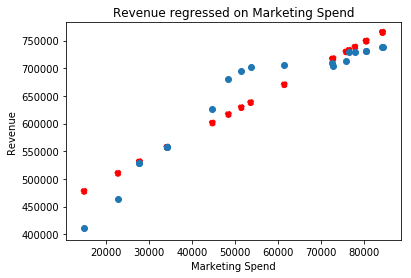

In [ ]:
plt.scatter(indep_train, regressor.predict(indep_train), c='r', linestyle='--')
plt.scatter(indep_train, dep_train)
plt.title('Revenue regressed on Marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Revenue')
plt.show()

### Model Evaluation

In [35]:
# RMSE
np.sqrt(mean_squared_error(dep_test, regressor.predict(indep_test)))

34196.27932979175

### Feature Scaling

In [36]:
from sklearn.preprocessing import StandardScaler

indep_scaler = StandardScaler()
indep_train_scaled = indep_scaler.fit_transform(indep_train)
indep_test_scaled = indep_scaler.transform(indep_test)

dep_scaler = StandardScaler()
dep_train_scaled = dep_scaler.fit_transform(dep_train.values.reshape(-1,1))

In [37]:
# Model Building

regressor = LinearRegression()
regressor.fit(indep_train_scaled, dep_train_scaled)

LinearRegression()

In [38]:
regressor.predict(indep_test_scaled)

array([[-0.72922647],
       [-1.20028505],
       [ 1.47317973],
       [ 0.91259514],
       [ 0.26074295]])

In [39]:
# Inverse Transform
dep_scaler.inverse_transform(regressor.predict(indep_test_scaled))

array([[576603.75904591],
       [529661.2058578 ],
       [796080.85653536],
       [740216.7388813 ],
       [675257.50154705]])

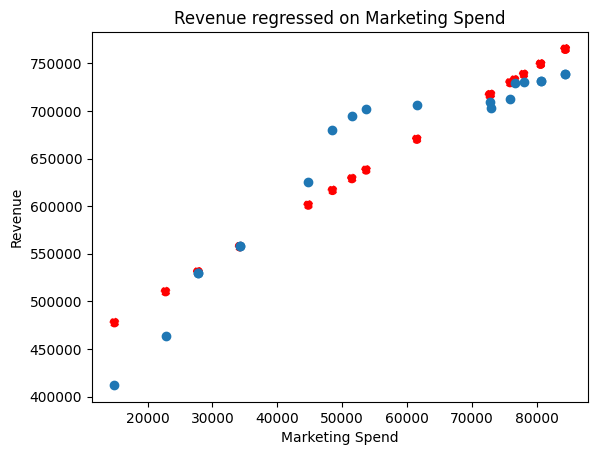

In [40]:
plt.scatter(indep_train, 
            dep_scaler.inverse_transform(regressor.predict(indep_train_scaled)), 
            c='r', 
            linestyle='--')
plt.scatter(indep_train, dep_train)

plt.title('Revenue regressed on Marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Revenue')
plt.show()

In [41]:
# Polynomial features = 2
from sklearn.preprocessing import PolynomialFeatures

quadratic_featurizer = PolynomialFeatures (degree=2)

In [42]:
indep_train_quadratic = quadratic_featurizer.fit_transform(indep_train)
indep_train_quadratic

array([[1.00000000e+00, 7.80000000e+04, 6.08400000e+09],
       [1.00000000e+00, 8.06050000e+04, 6.49716602e+09],
       [1.00000000e+00, 8.44000000e+04, 7.12336000e+09],
       [1.00000000e+00, 8.06000000e+04, 6.49636000e+09],
       [1.00000000e+00, 7.58940000e+04, 5.75989924e+09],
       [1.00000000e+00, 2.27690000e+04, 5.18427361e+08],
       [1.00000000e+00, 6.15190000e+04, 3.78458736e+09],
       [1.00000000e+00, 7.28990000e+04, 5.31426420e+09],
       [1.00000000e+00, 5.15040000e+04, 2.65266202e+09],
       [1.00000000e+00, 4.47730000e+04, 2.00462153e+09],
       [1.00000000e+00, 8.44210000e+04, 7.12690524e+09],
       [1.00000000e+00, 3.42310000e+04, 1.17176136e+09],
       [1.00000000e+00, 5.36930000e+04, 2.88293825e+09],
       [1.00000000e+00, 4.85070000e+04, 2.35292905e+09],
       [1.00000000e+00, 2.77500000e+04, 7.70062500e+08],
       [1.00000000e+00, 2.77810000e+04, 7.71783961e+08],
       [1.00000000e+00, 1.48850000e+04, 2.21563225e+08],
       [1.00000000e+00, 3.42000

In [43]:
indep_test_quadratic = quadratic_featurizer.transform(indep_test)

In [44]:
regressor_quad= LinearRegression()
regressor_quad.fit(indep_train_quadratic, dep_train)

LinearRegression()

In [45]:
regressor_quad.predict(indep_test_quadratic)

array([603488.61378909, 520023.07473104, 714319.32713634, 729784.30218126,
       710263.38333459])

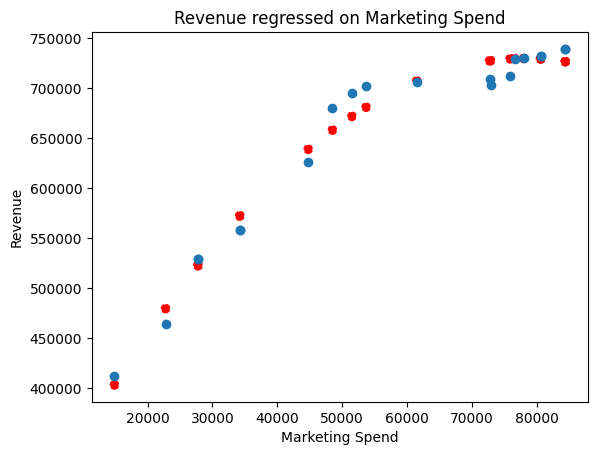

In [46]:
plt.scatter(indep_train, regressor_quad.predict(indep_train_quadratic), c='r', linestyle='--')

plt.scatter(indep_train, dep_train)

plt.title('Revenue regressed on Marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Revenue')
plt.show()

In [47]:
# RMSE
np.sqrt(mean_squared_error(dep_test, regressor_quad.predict(indep_test_quadratic)))

19885.369755931097

In [48]:
# Polynomial Features = 9 
from sklearn.preprocessing import PolynomialFeatures
ninth_featurizer = PolynomialFeatures(degree=9)

In [49]:
indep_train_ninth = ninth_featurizer.fit_transform(indep_train)
indep_train_ninth

array([[1.00000000e+00, 7.80000000e+04, 6.08400000e+09, 4.74552000e+14,
        3.70150560e+19, 2.88717437e+24, 2.25199601e+29, 1.75655689e+34,
        1.37011437e+39, 1.06868921e+44],
       [1.00000000e+00, 8.06050000e+04, 6.49716602e+09, 5.23704067e+14,
        4.22131664e+19, 3.40259227e+24, 2.74265950e+29, 2.21072069e+34,
        1.78195141e+39, 1.43634194e+44],
       [1.00000000e+00, 8.44000000e+04, 7.12336000e+09, 6.01211584e+14,
        5.07422577e+19, 4.28264655e+24, 3.61455369e+29, 3.05068331e+34,
        2.57477672e+39, 2.17311155e+44],
       [1.00000000e+00, 8.06000000e+04, 6.49636000e+09, 5.23606616e+14,
        4.22026932e+19, 3.40153708e+24, 2.74163888e+29, 2.20976094e+34,
        1.78106732e+39, 1.43554026e+44],
       [1.00000000e+00, 7.58940000e+04, 5.75989924e+09, 4.37141793e+14,
        3.31764392e+19, 2.51789268e+24, 1.91092947e+29, 1.45028081e+34,
        1.10067612e+39, 8.35347133e+43],
       [1.00000000e+00, 2.27690000e+04, 5.18427361e+08, 1.18040726e+13,
   

In [50]:
indep_test_ninth = ninth_featurizer.transform(indep_test)

In [51]:
regressor_ninth = LinearRegression()
regressor_ninth.fit(indep_train_ninth, dep_train)

LinearRegression()

In [52]:
regressor_ninth.predict(indep_test_ninth)

array([ 552778.13463086,  521745.13625218, 1562097.75434079,
        702484.31803424,  755784.2957779 ])

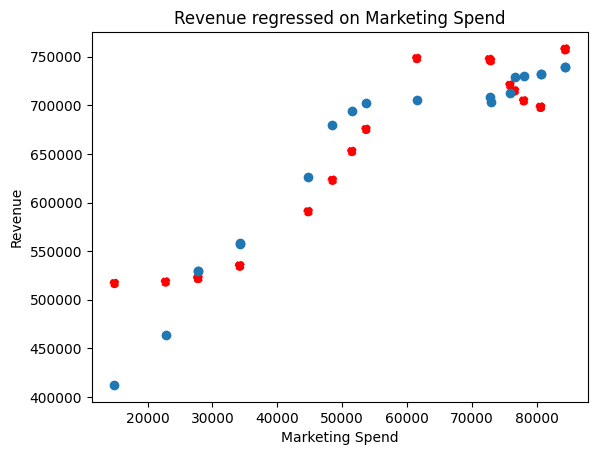

In [53]:
plt.scatter(indep_train, 
            regressor_ninth.predict(indep_train_ninth), 
            c='r', 
            linestyle='--')

plt.scatter(indep_train, dep_train)

plt.title('Revenue regressed on Marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Revenue')
plt.show()

In [54]:
# RMSE
np.sqrt(mean_squared_error(dep_test, regressor_ninth.predict(indep_test_ninth)))

367802.3468993644

In [1]:
#code for swapping two number 
#wrie wcode for swapping two numebr         

def dateBetweenTwoDates(begin,date) :
    if begin <= date <= end :
        return True
    else :
        return False
 

LinearRegression class MODELNAME(models.Model):
    """Model definition for MODELNAME."""

    # TODO: Define fields here

    class Meta:
        """Meta definition for MODELNAME."""

        verbose_name = 'MODELNAME'
        verbose_name_plural = 'MODELNAMEs'

    def __str__(self):
        """Unicode representation of MODELNAME."""
        pass





 



SyntaxError: invalid syntax (2130417872.py, line 1)